# Dynamic Programming Algorithms

This notebook covers three algorithms:
- policy evaluation
- policy iteration
- value iteration

In [1]:
import edugrid # registers the environment
from edugrid.algorithms.dynamic_programming import PolicyEvaluation, PolicyIteration, ValueIteration
from edugrid.algorithms.policy import Policy, StochasticPolicy
import gymnasium as gym
import numpy as np

In [2]:
env = gym.make(
    "philsteg/EduGrid-v0",
    size=(4, 4),
    agent_location=(1, 1),
    target_locations=[(0, 0), (3, 3)],
    normal_reward=-1,
    target_reward=-1,
)

## Helper functions for visualization

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from edugrid.visualization.dynamic_programming import visualize_policy, visualize_state_values

In [5]:
cm = 1/2.54  # centimeters in inches

def visualize(state_values: np.ndarray, policy: Policy, title: str | None = None):
    fig, axs = plt.subplots(1, 2)
    axs[0].set_title("State Values")
    visualize_state_values(axs[0], state_values)
    axs[1].set_title("Policy")
    visualize_policy(axs[1], policy, env.unwrapped.terminal_matrix)
    fig.set_size_inches(2 * 6.4, 4.8)
    fig.suptitle(title)
    fig.show()

## Policy Evaluation

In [6]:
random_policy = StochasticPolicy.from_env(env)
policy_evaluation = PolicyEvaluation(env, mode="state", gamma=1.0)

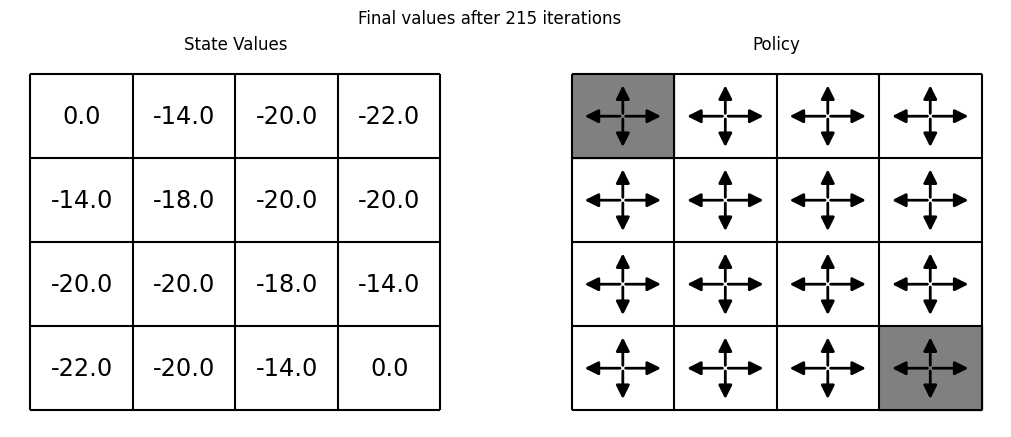

In [7]:
iterations, values = policy_evaluation.evaluate(random_policy)
visualize(values, random_policy, f"Final values after {iterations} iterations")

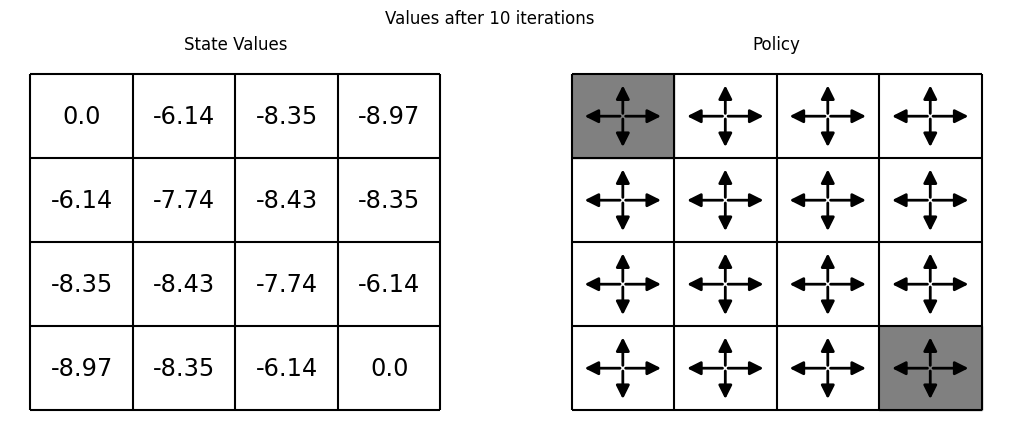

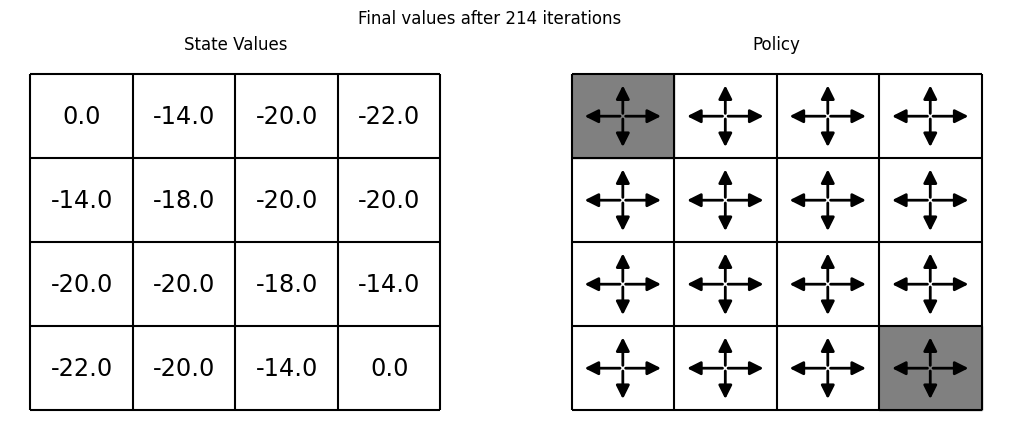

In [8]:
iterator = policy_evaluation.iter(random_policy)
iterations = 0

for i in range(10):
    iterations += 1
    values = next(iterator)

visualize(values, random_policy, f"Values after {iterations} iterations")

for values in iterator:
    iterations += 1

visualize(values, random_policy, f"Final values after {iterations} iterations")

## Policy Iteration

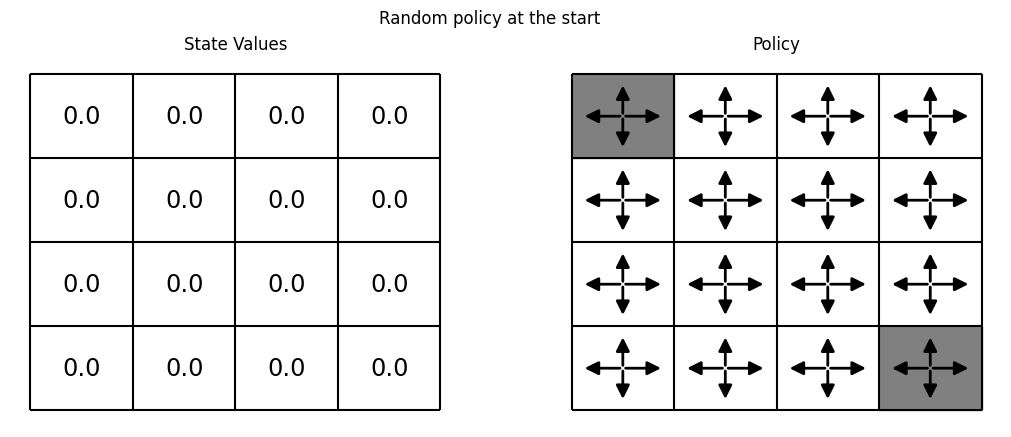

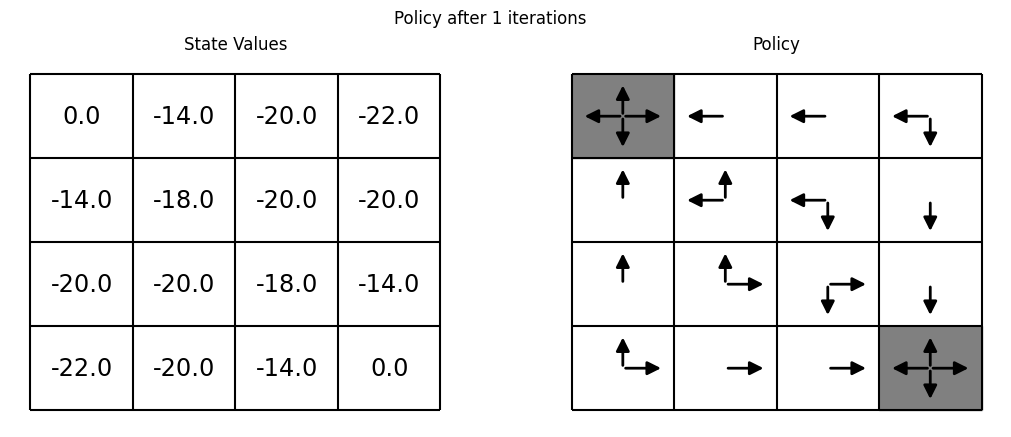

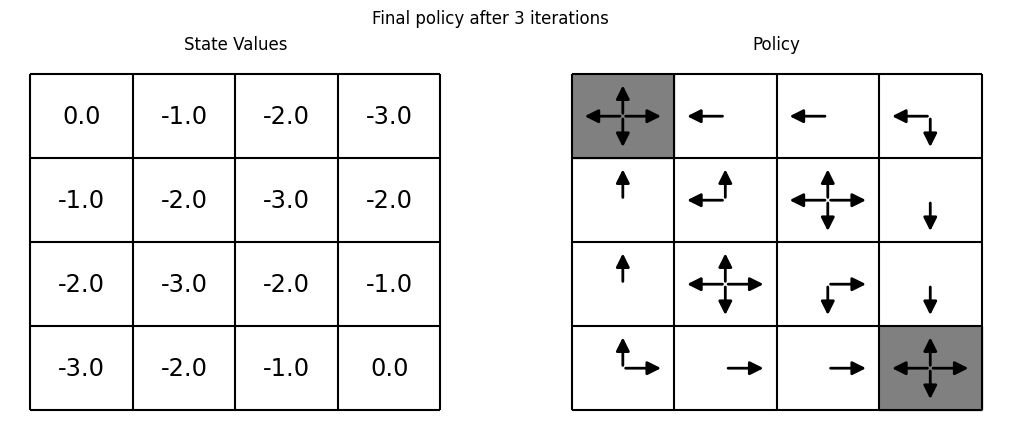

In [9]:
policy_iteration = PolicyIteration(env, mode="state", policy="stochastic", gamma=1.0)

visualize(policy_iteration.values, policy_iteration.policy, "Random policy at the start")

iterator = policy_iteration.iter()
iterations = 0

for i in range(1):
    iterations += 1
    eval_iterations, values, policy = next(iterator)

visualize(values, policy, f"Policy after {iterations} iterations")

for eval_iterations, values, policy in iterator:
    iterations += 1

visualize(values, policy, f"Final policy after {iterations} iterations")

## Value Iteration

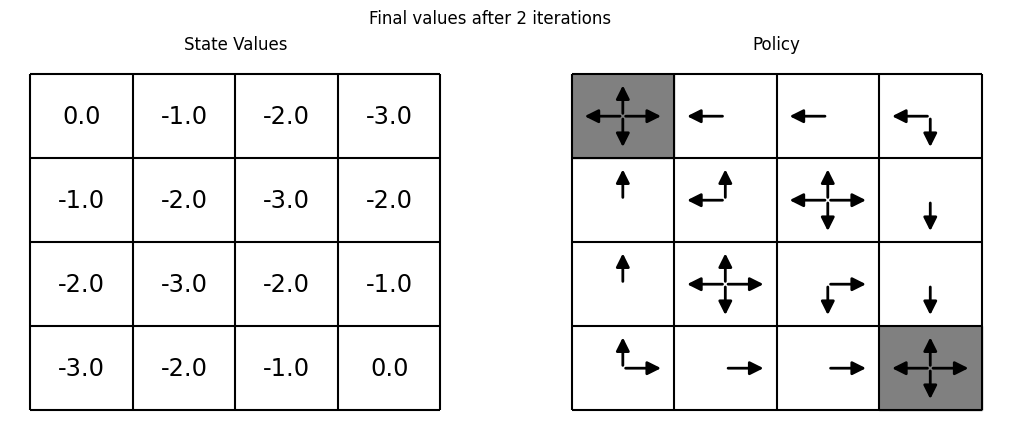

In [10]:
value_iteration = ValueIteration(env, mode="state", gamma=1.0)

for i, values in enumerate(value_iteration.iter()):
    ...

policy = value_iteration.get_policy(values, type="stochastic")

visualize(values, policy, f"Final values after {i} iterations")